# Team Assignment Using Colors of Player Jersey with K-Means Clustering

## Importing Package

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Specifying The Path

In [3]:
image_path = "../output_images/player_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB

# Opening Image

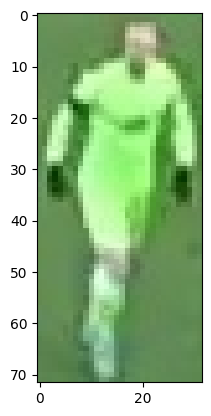

In [4]:
plt.imshow(image)
plt.show()

# Extracting Top Half Of Image

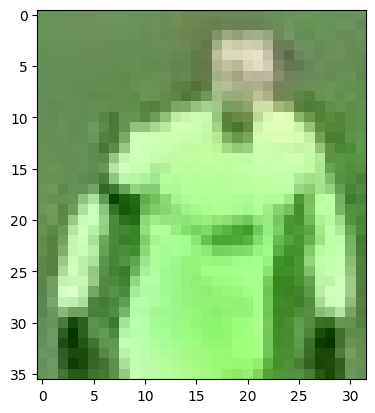

In [6]:

top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Dividing the Image Colors Into Two Clusters

d:\Anaconda3\envs\koraEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


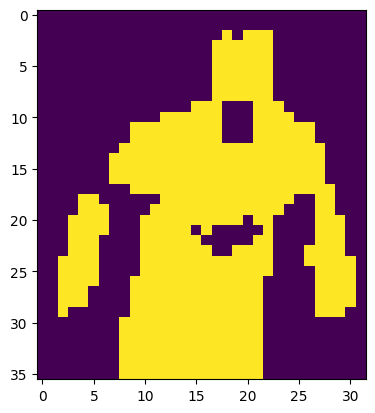

In [7]:
#Reshaping the image into the 2d Array
image_2d = top_half_image.reshape(-1,3)

# K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Getting the cluster labels
labels = kmeans.labels_

# Reshaping the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Displaying the clustered image
plt.imshow(clustered_image)
plt.show()

# Analysing Corner of Clustered Image to Get the Team Color

In [9]:
# Getting the corner colors
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1],clustered_image[-1, 0], clustered_image[-1, -1]]

# Getting the most common cluster
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

# Getting the non-player cluster
print(non_player_cluster)

0


In [10]:
# Getting the player cluster
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [11]:
kmeans.cluster_centers_[player_cluster]

array([172.93927126, 237.9534413 , 147.76720648])